In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import data.units as parameters_names
import transporters.transporters_factory as transporters_factory
from transporters.approximator.configuration import ApproximatorConfiguration
from data.grid_configuration import CanonicalCoordinatesGridConfiguration
from data.parameters_names import ParametersNames as Parameters

sns.set_style("whitegrid")

Welcome to JupyROOT 6.18/04


In [3]:
path_to_optics = "path_to_folder_with_optics"
optic_folder_name = "2016"
serialized_approximator_file_name = "parametrization_6500GeV_0p4_185_reco.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

In [4]:
path_to_approximator = os.path.join(path_to_project, optic_folder_name, serialized_approximator_file_name)
approximator_configuration = ApproximatorConfiguration(path_to_approximator, approximator_name)
transporter = transporters_factory.get_transporter(approximator_configuration)

In [6]:
# Parameters of bunch
x_mean = 0.0
delta_x = 10e-6
theta_x_mean = 0
delta_theta_x = 10e-6
y_mean = 0.0
delta_y = 10e-6
theta_y_mean = 0.00
delta_theta_y = 10e-6
pt_mean = -0.01
delta_pt = 0.001

particles_number = 1000
grid_configuration = CanonicalCoordinatesGridConfiguration.from_sigma(x_mean, delta_x, particles_number,
                                                        theta_x_mean, delta_theta_x, 1,
                                                        y_mean, delta_y, 1,
                                                        theta_y_mean, delta_theta_y, 1,
                                                        pt_mean, delta_pt, 1)
particles = grid_configuration.generate_randomly()

In [7]:
output_segments = transporter(particles)

In [10]:
# Names of segments, like MQXA.3R5
start_segment_name = "start"
end_segment_name = "end"

if start_segment_name != "start":
    output_segments[start_segment_name].T[1] -= 1

In [11]:
output_matrix = output_segments[end_segment_name]
input_matrix = output_segments[start_segment_name]

In [12]:
def plot_histogram(x_name, y_name, x_name_prefix, y_name_prefix, 
                   x_matrix, y_matrix,
                   plot_axes, plot_x_pos, plot_y_pos):
    
    title = "Histogram " + x_name_prefix + parameters_names.alternative_version[x_name] + " and " + \
            y_name_prefix + parameters_names.alternative_version[y_name] + " parameter"
    
    # Get vectors and their properties
    
    
    vector_x = pd.Series(x_matrix.get_canonical_coordinates_of(x_name).reshape((-1,)), name=x_name_prefix + parameters_names.alternative_version[x_name])
    vector_y = pd.Series(y_matrix.get_canonical_coordinates_of(y_name).reshape((-1,)), name=y_name_prefix + parameters_names.alternative_version[y_name])
    
    bins_number = 50
    
    sns.distplot(vector_x, bins=bins_number, ax=axes[plot_x_pos][plot_y_pos], color='y').set_title(title)
    sns.distplot(vector_y, bins=bins_number, ax=axes[plot_x_pos][plot_y_pos], color='b').set_title(title)

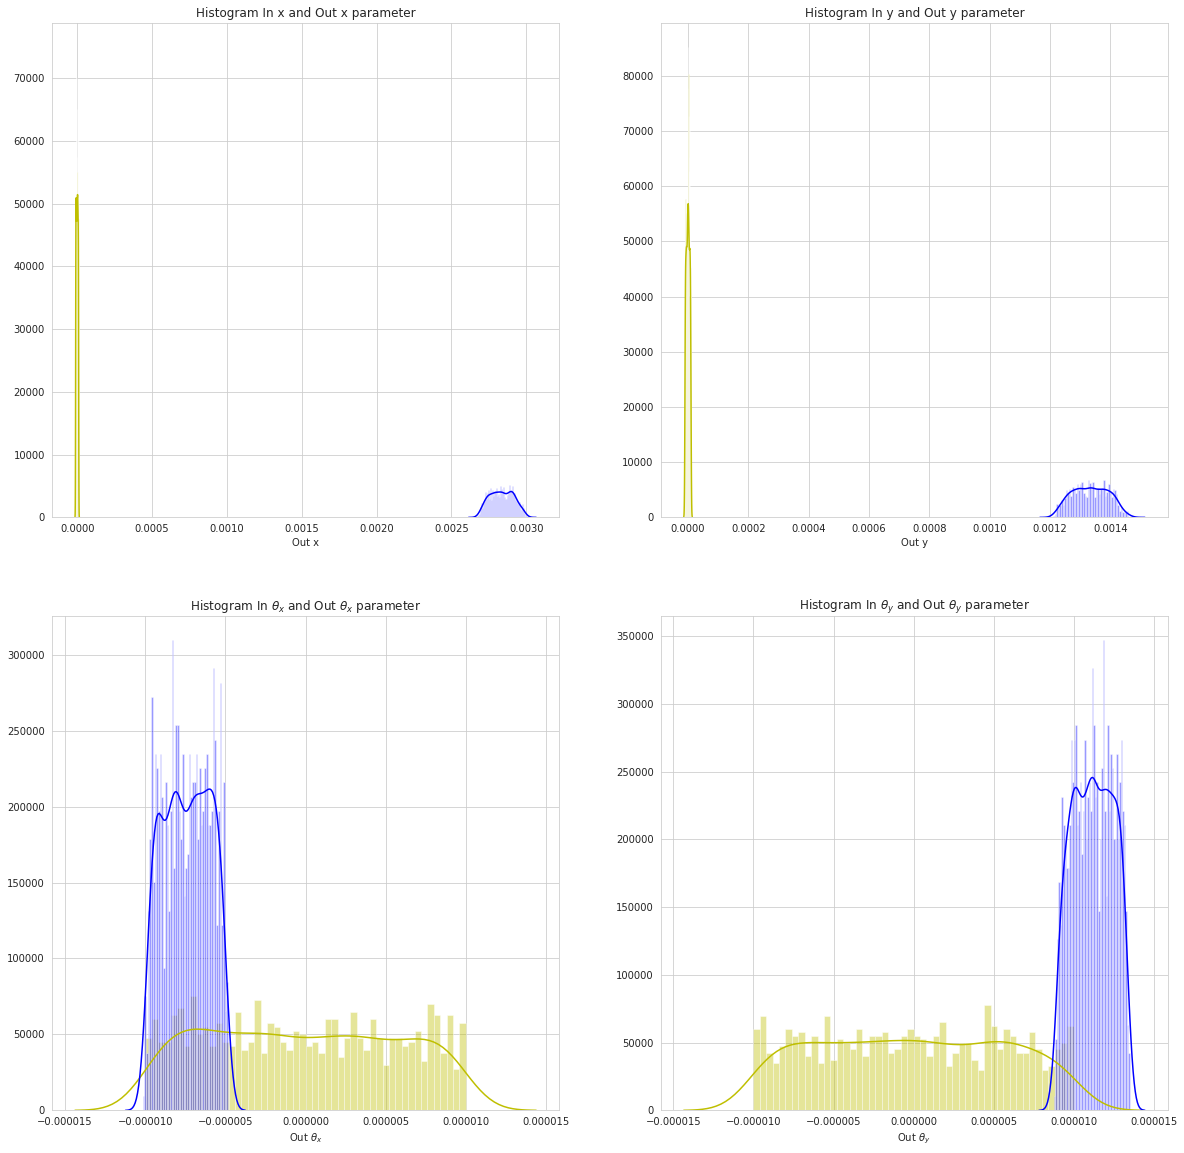

In [13]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

plot_histogram(Parameters.X, Parameters.X, "In ", "Out ", input_matrix, output_matrix, axes, 0, 0)

plot_histogram(Parameters.Y, Parameters.Y, "In ", "Out ", input_matrix, output_matrix, axes, 0, 1)

plot_histogram(Parameters.THETA_X, Parameters.THETA_X, "In ", "Out ", input_matrix, output_matrix, axes, 1, 0)

plot_histogram(Parameters.THETA_Y, Parameters.THETA_Y, "In ", "Out ", input_matrix, output_matrix, axes, 1, 1)
